# Versuch 251: Statistik

In [1]:
#import modules
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from numpy import exp, pi, sqrt
from scipy.special import gamma
from scipy.stats import chi2
%matplotlib inline
plt.rcParams["figure.figsize"][0] = 14
plt.rcParams["figure.figsize"][1] = 9
plt.rcParams['errorbar.capsize']=2

In [2]:
#fit functions
#linear function
def linear(x,a,c):
    return a*x+c

#gaussian distribution
def gaussian(x, A, mu, sig):
    return A/(sqrt(2*pi)*sig)*exp(-(x-mu)**2/2/sig**2)

#poisson distribution
def poisson(x, A_p, mu_p):
    return A_p*exp(-mu_p)*mu_p**x/gamma(x+1)

## Zählrohrcharakteristik

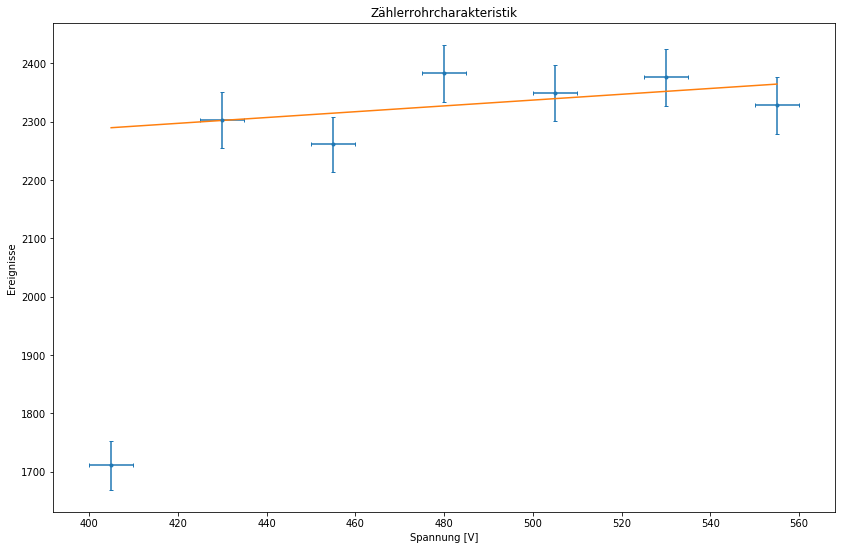

In [4]:
#counter tube voltage
U=np.array([405, 430, 455, 480, 505, 530, 555])
U_err = 5

#counted occurences
N=np.array([1711, 2303, 2261, 2383, 2349, 2376, 2328])
err_N=np.sqrt(N)

#linear fit to data
popt1, pcov1=curve_fit(linear, U[1:], N[1:])
perr1 = np.sqrt(np.diag(pcov1))

#plot data and fit
plt.figure('counter tube')
plt.errorbar(U, N, err_N, U_err, fmt=".")
plt.xlabel('Spannung [V]')
plt.ylabel('Ereignisse')
plt.title('Zählerrohrcharakteristik')
plt.plot(U, linear(U,*popt1))
plt.savefig('Diagramme\Zählerrohrcharakteristik.pdf' ,format='pdf')

## Auswertung der Daten hoher mittlerer Energie

In [5]:
#import data
anzahl, häufigkeit=np.loadtxt('Daten/q_t_1.dat', unpack=True)
err=np.sqrt(häufigkeit)
maskhg = [(anzahl < 93)&(anzahl > 46)]
maskhp = [(anzahl < 93)&(anzahl > 46)]

#fit gaussian distribution
popt2g, pcov2g=curve_fit(gaussian,anzahl[maskhg], häufigkeit[maskhg],p0=[2300,66.5,7.5],sigma=err[maskhg])
perr2g = np.sqrt(np.diag(pcov2g))

#fit poisson distribution
popt2p, pcov2p = curve_fit(poisson, anzahl[maskhp], häufigkeit[maskhp], p0=[2500,67], sigma=err[maskhp])
perr2p = np.sqrt(np.diag(pcov2p))

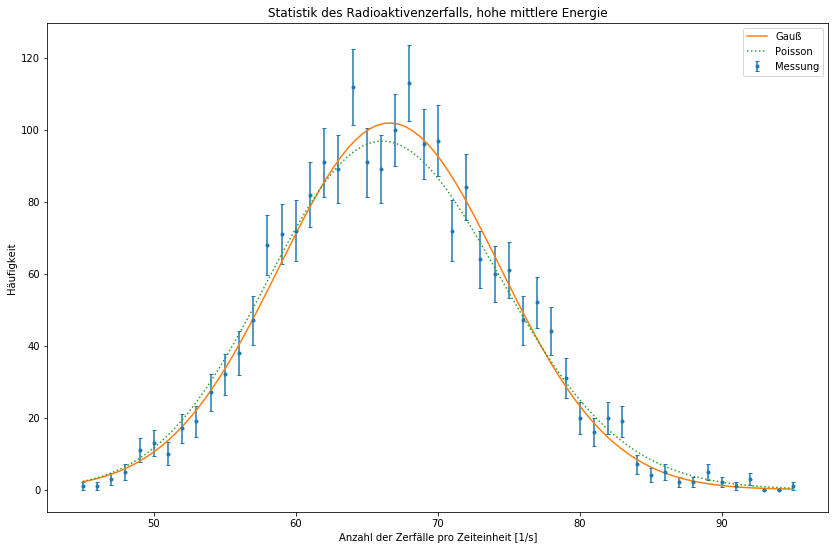

In [6]:
#plot fit
plt.figure('high')
plt.errorbar(anzahl,häufigkeit,err, fmt=".",label='Messung')
plt.xlabel('Anzahl der Zerfälle pro Zeiteinheit [1/s]')
plt.ylabel('Häufigkeit')
plt.title('Statistik des Radioaktivenzerfalls, hohe mittlere Energie')
x=np.linspace(45,95,100)
plt.plot(x, gaussian(x,*popt2g), label='Gauß')
plt.plot(x, poisson(x,*popt2p), label='Poisson', linestyle=':')
plt.legend()
plt.savefig('Diagramme\Statistik des radioaktive Zeralls high.pdf' ,format='pdf')

In [7]:
#print fit parameters and qulity
print("Gaußfit:")
print("A=",popt2g[0], ",Standardfehler=", perr2g[0])
print("mu=",popt2g[1], ",Standardfehler=", perr2g[1])
print("sig=",popt2g[2], ",Standardfehler=", perr2g[2])
chi2_g=np.sum((gaussian(anzahl[maskhg],*popt2g)-häufigkeit[maskhg])**2/err[maskhg]**2)
dof_g=len(anzahl[maskhg])-3
chi2_red_g=chi2_g/dof_g
prob_g=round(1-chi2.cdf(chi2_g,dof_g),2)*100
print("chi2_g", chi2_g)
print("chi2_red_g", chi2_red_g)
print("Fitwahrscheinlichkeit Gauß:", prob_g, "%")
print()

print("Poissonfit:")
print("A_p=",popt2p[0], ",Standardfehler=", perr2p[0])
print("mu_p=",popt2p[1], ",Standardfehler=", perr2p[1])
chi2_p=np.sum((poisson(anzahl[maskhp],*popt2p)-häufigkeit[maskhp])**2/err[maskhp]**2)
dof_p=len(anzahl[maskhp])-3
chi2_red_p=chi2_p/dof_p
prob_p=round(1-chi2.cdf(chi2_p,dof_p),2)*100
print("chi2_p", chi2_p)
print("chi2_red_p", chi2_red_p)
print("Fitwahrscheinlichkeit Poisson:", prob_p, "%")

Gaußfit:
A= 1987.82043395 ,Standardfehler= 41.318196572
mu= 66.6117814924 ,Standardfehler= 0.165286269452
sig= 7.78171791663 ,Standardfehler= 0.124961860915
chi2_g 36.688559244
chi2_red_g 0.853222308
Fitwahrscheinlichkeit Gauß: 74.0 %

Poissonfit:
A_p= 1980.40918696 ,Standardfehler= 45.5465743221
mu_p= 66.602133407 ,Standardfehler= 0.18301957458
chi2_p 45.8025713527
chi2_red_p 1.06517607797
Fitwahrscheinlichkeit Poisson: 36.0 %


## Auswertung der Daten geringer mittlerer Energie

In [8]:
#import data
anzahl, häufigkeit=np.loadtxt('Daten/q_t2.dat', unpack=True)
err=np.sqrt(häufigkeit)
maskhg = [(anzahl < 13)&(anzahl > 0)]
maskhp = [(anzahl < 13)&(anzahl > 0)]

#fit gaussian distribution
popt2g, pcov2g=curve_fit(gaussian,anzahl[maskhg], häufigkeit[maskhg],p0=[5000,5,2],sigma=err[maskhg])
perr2g = np.sqrt(np.diag(pcov2g))

#fit poisson distribution
popt2p, pcov2p = curve_fit(poisson, anzahl[maskhp], häufigkeit[maskhp], p0=[5000,5], sigma=err[maskhp])
perr2p = np.sqrt(np.diag(pcov2p))

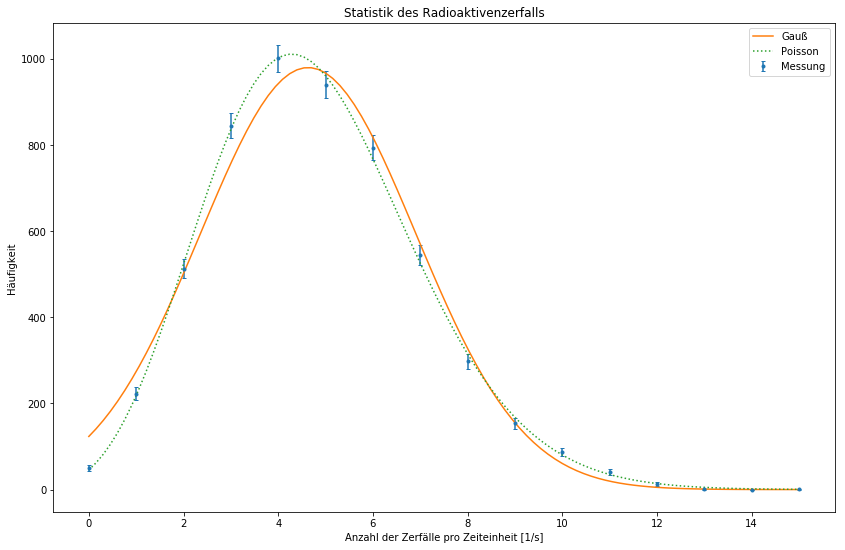

In [9]:
#plot fit
plt.figure('low')
plt.errorbar(anzahl,häufigkeit,err, fmt=".",label='Messung')
plt.xlabel('Anzahl der Zerfälle pro Zeiteinheit [1/s]')
plt.ylabel('Häufigkeit')
plt.title('Statistik des Radioaktivenzerfalls')
x=np.linspace(0, 15,100)
plt.plot(x, gaussian(x,*popt2g), label='Gauß')
plt.plot(x, poisson(x,*popt2p), label='Poisson', linestyle=':')
plt.legend()
plt.savefig('Diagramme\Statistik des radioaktive Zeralls low.pdf' ,format='pdf')

In [10]:
#print fit parameters and qulity
print("Gaußfit:")
print("A=",popt2g[0], ",Standardfehler=", perr2g[0])
print("mu=",popt2g[1], ",Standardfehler=", perr2g[1])
print("sig=",popt2g[2], ",Standardfehler=", perr2g[2])
chi2_g=np.sum((gaussian(anzahl[maskhg],*popt2g)-häufigkeit[maskhg])**2/err[maskhg]**2)
dof_g=len(anzahl[maskhg])-3
chi2_red_g=chi2_g/dof_g
prob_g=round(1-chi2.cdf(chi2_g,dof_g),2)*100
print("chi2_g", chi2_g)
print("chi2_red_g", chi2_red_g)
print("Fitwahrscheinlichkeit Gauß:", prob_g, "%")
print()

print("Poissonfit:")
print("A_p=",popt2p[0], ",Standardfehler=", perr2p[0])
print("mu_p=",popt2p[1], ",Standardfehler=", perr2p[1])
chi2_p=np.sum((poisson(anzahl[maskhp],*popt2p)-häufigkeit[maskhp])**2/err[maskhp]**2)
dof_p=len(anzahl[maskhp])-3
chi2_red_p=chi2_p/dof_p
prob_p=round(1-chi2.cdf(chi2_p,dof_p),2)*100
print("chi2_p", chi2_p)
print("chi2_red_p", chi2_red_p)
print("Fitwahrscheinlichkeit Poisson:", prob_p, "%")

Gaußfit:
A= 5587.83580628 ,Standardfehler= 189.422689924
mu= 4.63202447258 ,Standardfehler= 0.0846990021531
sig= 2.2751841486 ,Standardfehler= 0.0733894727708
chi2_g 54.0430168036
chi2_red_g 6.00477964485
Fitwahrscheinlichkeit Gauß: 0.0 %

Poissonfit:
A_p= 5500.30855456 ,Standardfehler= 57.6813911929
mu_p= 4.79322090421 ,Standardfehler= 0.0235848505062
chi2_p 5.98937790861
chi2_red_p 0.66548643429
Fitwahrscheinlichkeit Poisson: 74.0 %
